#### Case Study with Data Shipping Order Datasets

##### Burhanudin Yusuf Habibi

In [1]:
 import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [6]:
data = pd.read_csv('shopping_data.csv')

print(data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [7]:
print(data.head(10))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


#### Cek Nilai Data Kosong

In [8]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 

## Klasifikasikan Data Berdasarkan Rentang Usia

#### Membuat klasifikasi pada rentang usia tertentu

Rentang usia 18-25 tahun akan dikategorikan sebagai Usia Muda (Young Age)

Rentang usia 26-55 tahun akan dikategorikan sebagai Usia Dewasa/Produktif (Produktif Age)

Rentang usia >56 tahun akan dikategorikan sebagai Usia Tua/Pensiun (Retirement Age)

In [9]:
import numpy as np

In [10]:
conditions = [
    (data["Age"] <= 25),
    (data["Age"] >= 26) & (data["Age"] <= 55), 
    (data["Age"] >= 56)
]

value = ["Young Age", "Productive Age", "Retirement Age"]

#### Membuat Kolom Baru Pada dengan nama  Age Classification 

In [11]:
data["Age Clasification"] = np.select(conditions, value)

In [12]:
print(data["Age Clasification"].head(10))

0         Young Age
1         Young Age
2         Young Age
3         Young Age
4    Productive Age
5         Young Age
6    Productive Age
7         Young Age
8    Retirement Age
9    Productive Age
Name: Age Clasification, dtype: object


#### Kategorikan Data Pada Variabel Tertentu

In [13]:
dt_YA = data[data["Age Clasification"] == "Young Age"]
dt_PA = data[data["Age Clasification"] == "Productive Age"]
dt_RA = data[data["Age Clasification"] == "Retirement Age"]

In [14]:
data["Age Clasification"].describe()

count                200
unique                 3
top       Productive Age
freq                 133
Name: Age Clasification, dtype: object

#### Deksripsikan Berdasarkan Masing-masing Data

In [15]:
dt_YA.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,38.000000,38.000000,38.000000,38.000000
mean,68.289474,21.157895,45.684211,54.947368
std,48.768016,2.224268,21.134198,25.118043
min,1.000000,18.000000,15.000000,5.000000
25%,24.000000,19.000000,25.250000,41.250000
50%,67.500000,21.000000,48.000000,55.000000
75%,110.500000,23.000000,62.750000,75.750000
max,163.000000,25.000000,81.000000,94.000000


In [16]:
dt_PA.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,133.000000,133.000000,133.000000,133.000000
mean,113.075188,38.578947,66.308271,51.421053
std,58.650044,8.203113,27.124064,26.725374
min,5.000000,26.000000,17.000000,1.000000
25%,57.000000,32.000000,44.000000,32.000000
50%,123.000000,37.000000,69.000000,50.000000
75%,165.000000,47.000000,85.000000,74.000000
max,200.000000,55.000000,137.000000,99.000000


In [17]:
dt_RA.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,29.000000,29.000000,29.000000,29.000000
mean,85.034483,63.275862,53.689655,38.379310
std,45.198359,4.471310,18.384977,18.872531
min,9.000000,56.000000,19.000000,3.000000
25%,61.000000,59.000000,46.000000,15.000000
50%,75.000000,64.000000,54.000000,47.000000
75%,110.000000,67.000000,63.000000,52.000000
max,179.000000,70.000000,93.000000,60.000000


### 

#### Visualisasi Data Usia

In [18]:
import matplotlib.pyplot as plt

In [19]:
y = np.array([38, 133, 29])
my_labels = ["Young Age", "Productive Age", "Retirement Age"]

([<matplotlib.patches.Wedge at 0x21bf5585f70>,
 [Text(-0.6182917088228987, 0.90978863633311, 'Young Age'),
  Text(0.15499141223004662, -1.0890260153618627, 'Productive Age'),
  Text(0.48393298140592467, 0.987830384989029, 'Retirement Age')],
 [Text(-0.33725002299430834, 0.49624834709078725, '19.0%'),
  Text(0.08454077030729815, -0.5940141901973796, '66.5%'),
  Text(0.2639634444032316, 0.5388165736303794, '14.5%')])

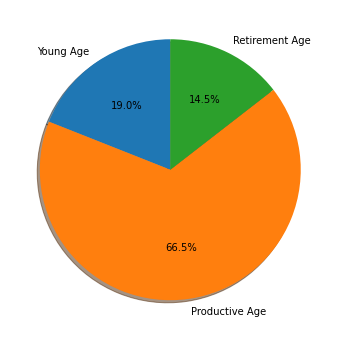

In [20]:
plt.figure(figsize=(10, 6))

plt.pie(y, labels = my_labels, startangle = 90, autopct='%1.1f%%', shadow = True)

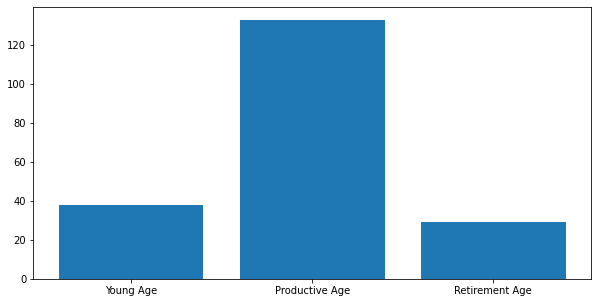

In [53]:
plt.figure(figsize=(10,5))

plt.bar(my_labels, y)

plt.show()

### Analisis Pada Klasifikasi Data Berdasarkan Usia

##### Rata-rata Age

Mean : 21 Tahun untuk Usia Muda (Young Age) 

Mean : 38 Tahun untuk Usia Produktif (Produktif Age)

Mean : 63 Tahun untuk Usia Pensiun (Retirement Age) 


##### Rata-rata Annual Income 

Mean : 45.6k $ untuk Usia Muda (Young Age) 

Mean : 66.3k $ untuk Usia Produktif (Produktif Age)

Mean : 53.6k $ untuk Usia Pensiun (Retirement Age) 



##### Rata-rata Spending Score

Mean : 54.9% untuk Usia Muda (Young Age) 

Mean : 51.4% untuk Usia Produktif (Produktif Age)

Mean : 38.37% untuk Usia Pensiun (Retirement Age) 


##### Jumlah Data

38 data untuk Usia Muda (Young Age) 

133 data untuk Usia Produktif (Produktif Age)

29 data untuk Usia Pensiun (Retirement Age) 



Pada data tersebut dapat dilihat bahwa rentang sebaran data terbanyak ada pada usia produktif dengan data terbanyak sebanyak 133 data beserta dengan Annual Income (pedapatan) terbanyak ada pada rentang usia ini juga dengan nilai rata-rata sekitar 66.3k $ pertahun. Namun, untuk Spending Score (pengeluaran) terbesar malah berada pada rentang usia muda dengan nilai 59.4% 

## Klasifikasi Data Berdasarkan Gender

In [22]:
print(data["Genre"].head(10))

0      Male
1      Male
2    Female
3    Female
4    Female
5    Female
6    Female
7    Female
8      Male
9    Female
Name: Genre, dtype: object


In [23]:
dt_F = data[data["Genre"] == "Female"]
dt_M = data[data["Genre"] == "Male"]

In [24]:
data["Genre"].describe()

count        200
unique         2
top       Female
freq         112
Name: Genre, dtype: object

#### Deksripsikan Berdasarkan Masing-masing Data

In [25]:
data[data["Genre"] == "Male"].describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,88.000000,88.000000,88.000000,88.000000
mean,104.238636,39.806818,62.227273,48.511364
std,57.483830,15.514812,26.638373,27.896770
min,1.000000,18.000000,15.000000,1.000000
25%,59.500000,27.750000,45.500000,24.500000
50%,106.500000,37.000000,62.500000,50.000000
75%,151.250000,50.500000,78.000000,70.000000
max,200.000000,70.000000,137.000000,97.000000


In [26]:
data[data["Genre"] == "Female"].describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,112.000000,112.000000,112.000000,112.000000
mean,97.562500,38.098214,59.250000,51.526786
std,58.276412,12.644095,26.011952,24.114950
min,3.000000,18.000000,16.000000,5.000000
25%,46.750000,29.000000,39.750000,35.000000
50%,94.500000,35.000000,60.000000,50.000000
75%,148.250000,47.500000,77.250000,73.000000
max,197.000000,68.000000,126.000000,99.000000


## 

#### Visualisasi Data Gender

In [27]:
x = np.array([112, 88])
my_label = ["Female", "Male"]

([<matplotlib.patches.Wedge at 0x21bf566dd30>,
 [Text(-1.080515974257694, -0.20611945413751373, 'Female'),
  Text(1.080515974257694, 0.20611945413751362, 'Male')],
 [Text(-0.5893723495951058, -0.11242879316591657, '56.0%'),
  Text(0.5893723495951058, 0.1124287931659165, '44.0%')])

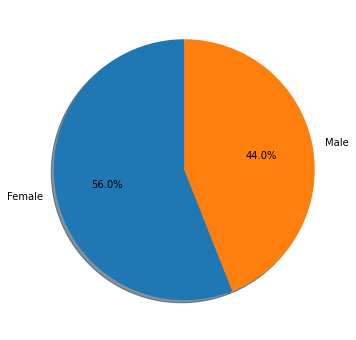

In [28]:
plt.figure(figsize=(10, 6))

plt.pie(x, labels = my_label, startangle = 90, autopct='%1.1f%%', shadow = True)

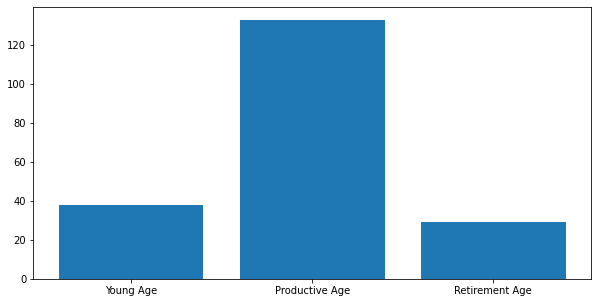

In [29]:
plt.figure(figsize=(10,5))

plt.bar(my_labels, y)

plt.show()

### Analisis Pada Klasifikasi Berdasarkan Gender


##### Rata-rata Age

Mean : 39 Tahun untuk Male (Laki-laki)

Mean : 38 Tahun untuk Female (Perempuan)


##### Rata-rata Annual Income

Mean : 62.2k $ untuk Male (Laki-laki)

Mean : 59.2k $ untuk Female (Perempuan)

##### Rata-rata Spending Score

Mean : 48.5% untuk Male (Laki-laki)

Mean : 51.5% untuk Female (Perempuan)


##### Jumlah Data

88 data untuk Male (Laki-laki)

112 data untuk Female (Perempuan)




Pada data dapat dilihat bahwa data terbanyak ada pada gender Female (perempuan) dengan jumlah Female sebanyak 112 orang. Namun, Annual Income (pendapatan) terbesar ada pada Male (Laki-laki) dengan nilai 62.2k $ serta berbending terbalik untuk Spending Score (pengeluaran) yang mana Female lebih besar yaitu sekitar 51.5%.

# 

### Buat Analisis Perbandingan Variable Age vs Annual Income 

In [30]:
import seaborn as sns

In [31]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

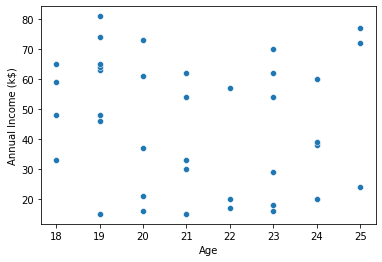

In [32]:
sns.scatterplot("Age", "Annual Income (k$)", data=dt_YA)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

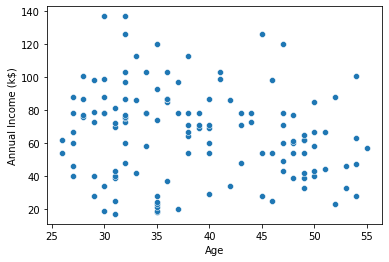

In [33]:
sns.scatterplot("Age", "Annual Income (k$)", data=dt_PA)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

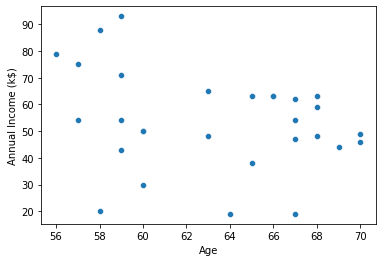

In [34]:
sns.scatterplot("Age", "Annual Income (k$)", data=dt_RA)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

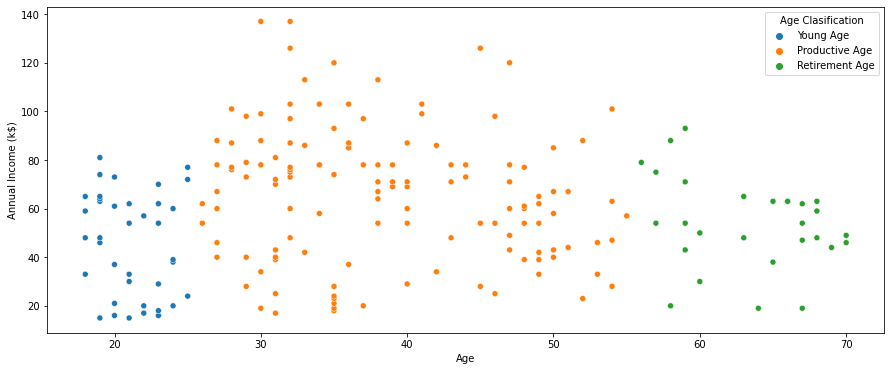

In [35]:
plt.figure(figsize=(15, 6))

sns.scatterplot("Age", "Annual Income (k$)", data=data, hue="Age Clasification")

### Sebaran Data Age vs Annual Income

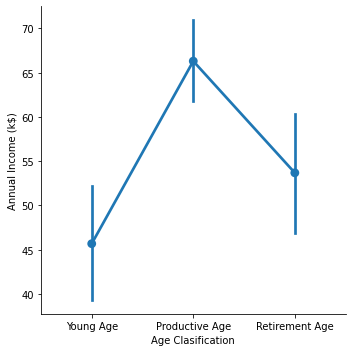

In [36]:
sns.catplot("Age Clasification", "Annual Income (k$)", data=data, kind='point')

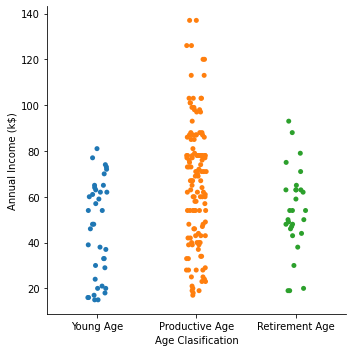

In [37]:
sns.catplot("Age Clasification", "Annual Income (k$)", data=data)

### Analisis Sebaran Data pada Variable Age vs Annual Income
    


##### Usia Muda (Young Age)

Pada usia muda (young age), sebaran data berpusat pada nilai 45 dengan persebaran nya ada pada rentang nilai 38 hingga 53 yang mana pada usia muda ini memiliki rentang sebaran data yang paling luas dibanding yang lain yang berarti pendapatan pada usia ini sangat bervariasi. Namun, pada rentang usia ini memiliki tingkat pendapatan terkecil dibanding rentang usia yang lain dengan rata-rata pendapatanya ada pada 45k $.
    

##### Usia Dewasa/Produktif (Produktif Age)

Pada usia produktif (produktif age), sebaran data nya berpusat pada nilai 66 dengan persebaran ada pada rentang nilai 63 hingga 72 yang mana pada usia produktif ini memiliki rentang sebaran data yang sempit dibanding yang lain yang berarti pendapatan pada usia ini cukup homogen dan relatif hampir sama. Pada rentang usia ini juga ini juga memiliki tingkat pendapatan tertinggi dibanding yang lain dengan nilai rata-rata 66k $.

##### Usia Tua (Retirement Age)

Pada usia pensiun (retirement age), sebaran data nya berpusat pada nilai 54 dengan persebaran data ada pada rentang 47 hingga 63 yang mana pada usia tua ini memiliki rentang sebaran data yang luas seperti pada usia muda. Namun, pada rentang usia ini juga memiliki tingkat rata-rata pendapatan yang cukup tinggi dibanding pada rentang usia muda dengan nilai 63k $.

### 

### Buat Analisis Perbandingan Variable Age vs Spending Score 

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

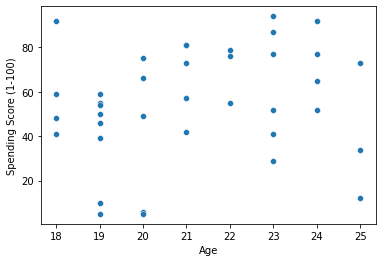

In [38]:
sns.scatterplot("Age", "Spending Score (1-100)", data=dt_YA)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

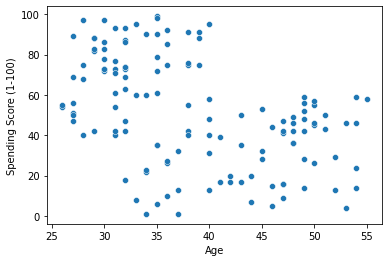

In [39]:
sns.scatterplot("Age", "Spending Score (1-100)", data=dt_PA)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

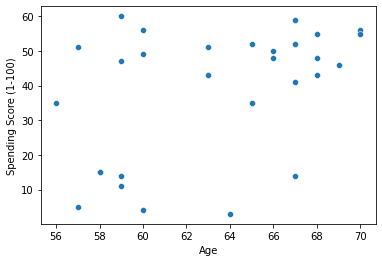

In [40]:
sns.scatterplot("Age", "Spending Score (1-100)", data=dt_RA)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

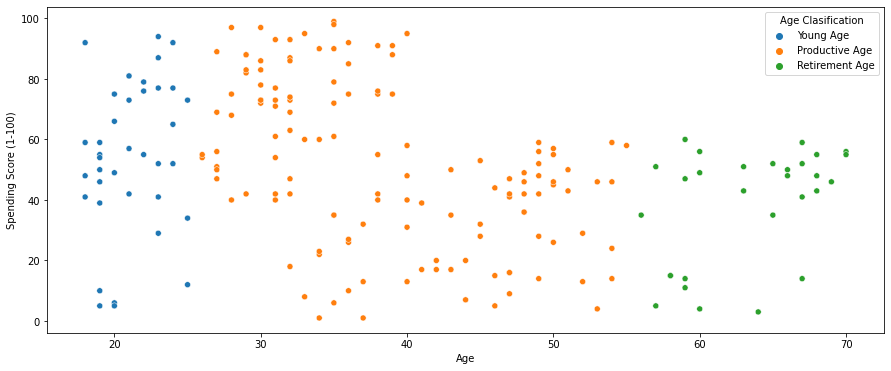

In [41]:
plt.figure(figsize=(15, 6))

sns.scatterplot("Age", "Spending Score (1-100)", data=data, hue="Age Clasification")

### Sebaran Data Age vs Spending Score 

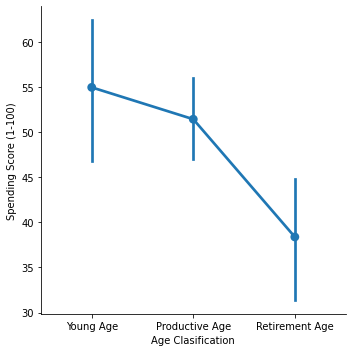

In [42]:
sns.catplot("Age Clasification", "Spending Score (1-100)", data=data, kind='point')

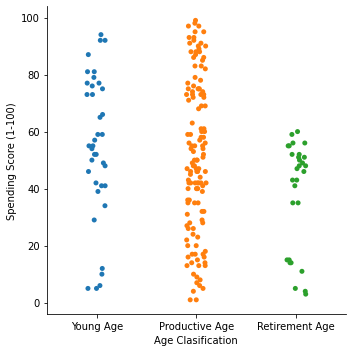

In [43]:
sns.catplot("Age Clasification", "Spending Score (1-100)", data=data)

### Analisis Sebaran Data pada Variable Age vs Annual Income

##### Usia Muda (Young Age)

Pada rentang usia ini memiliki tingkat Spending Score (pengeluaran) yang sangat tinggi dan beragam serta variatif. Berpusat pada nilai 55 dengan sebaran data pada rentang nilai 47 hingga 63.
    

#####  Usia Dewasa/Produktif (Productive Age)

Pada rentang usia ini memiliki tingkat Spending Score (pengeluaran) yang tidak terlalu besar namun cukup padat dan homogen. Berpusat pada nilai 54 dengan sebaran data pada rentang nilai 48 hingga 53.

##### Usia Tua/Pensiun (Retirement Age)

Pada rentang usia ini memiliki tingkat Spending Score (pengeluaran) yang paling rendah dibanding yang lain namun sebaran nya cukup besar dan beragam. Berpusat pada nilai 39 dengan sebaran data pada rentang nilai 31 hingga  44.

#### 

### Sebaran Data Variabel Genre vs Annual Income 

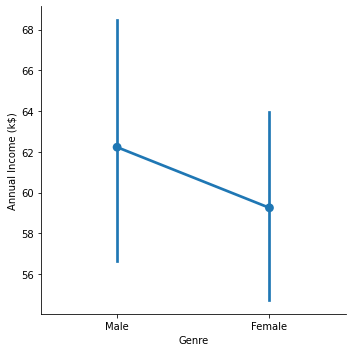

In [44]:
sns.catplot("Genre", "Annual Income (k$)", data=data, kind='point')

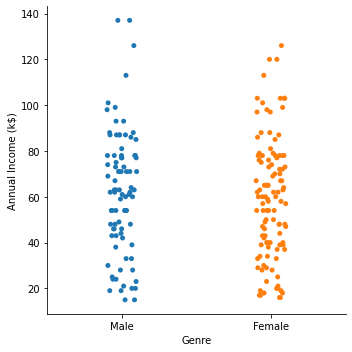

In [45]:
sns.catplot("Genre", "Annual Income (k$)", data=data)

### Analisis Sebaran Data pada Variable Genre vs Annual Income

##### Male (Laki-laki)

Pada gender Male (Laki-laki) memiliki Annual Income (pendapatan) yang lebih besar daripada Female (perempuan) berpusat pada nilai 62k $. Namun, sebaran data nya sangat variatif yang berada pada rentang nilai 57 hingga 68.

##### Female (Perempuan) 

Pada gender Female (Perempuan) memiliki Annual Income (pendapatan) yang berkebalikan dengan Male (laki-laki). Dimana Female memiliki Annual income (pendapatan) lebih kecil dengan nilai yang berpusat pada 59k $, serta sebaran datanya lebih kecil dibanding Male dengan rentang nilai 54 hingga 64.

### 

### Sebaran Data Variabel Genre vs Spending Score 

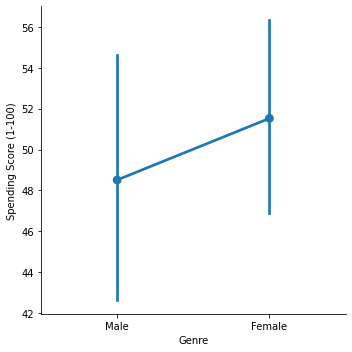

In [46]:
sns.catplot("Genre", "Spending Score (1-100)", data=data, kind='point')

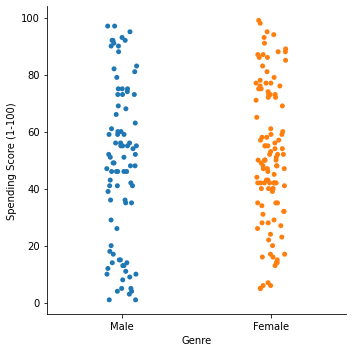

In [47]:
sns.catplot("Genre", "Spending Score (1-100)", data=data)

### Analisis Sebaran Data pada Variable Genre vs Spending Score 

Dapat dilihat bahwa Spending Score (pengeluaran) pada gender Female lebih tinggi (51) dibanding Male (48) dan sebaran nya pun lebih kecil yang berarti rata-rata Female memiliki tingkat pengeluaran cukup tinggi dibanding Male. Dengan rentang sebaran nilai Female antara 47 hingga 56 sedangkan pada Male 42 hingga 54.

### 

### Sebaran Data Variabel Genre vs Age


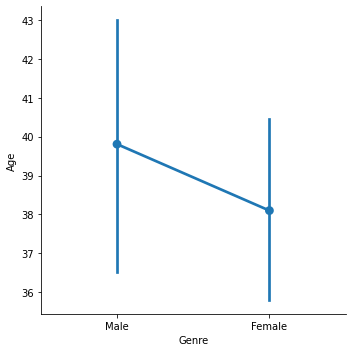

In [48]:
sns.catplot("Genre", "Age", data=data, kind='point')

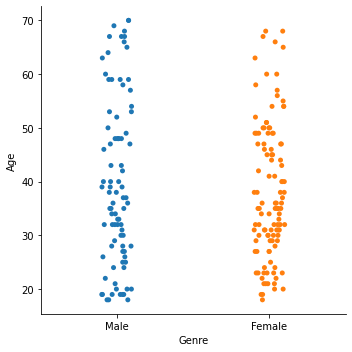

In [49]:
sns.catplot("Genre", "Age", data=data)

Pada data, Age (usia) rata-rata Male lebih tinggi dengan nilai variasi yang lebih tinggi dan beragam dibanding Female. Dengan sebaran data Male berpusat pada nilai 40 sedangkan pada Female 38. 

### 

<AxesSubplot:xlabel='Age', ylabel='count'>

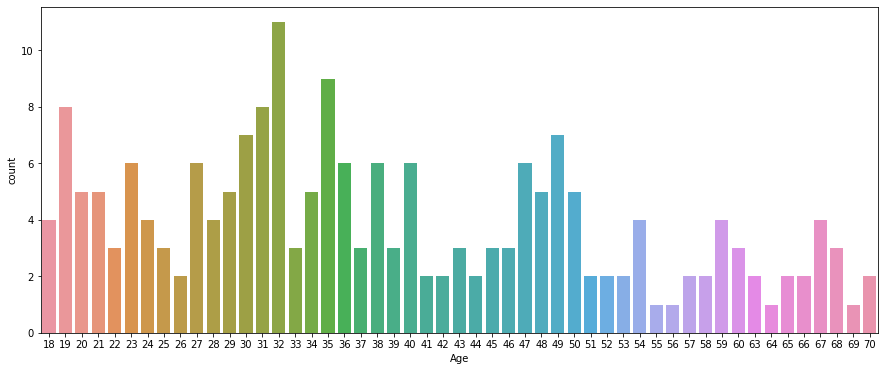

In [50]:
plt.figure(figsize=(15, 6))

sns.countplot("Age", data=data)

Data pada variable Age terbanyak ada pada usia 32 tahun dengan data lebih dari 10 orang.

## 

 # 

<AxesSubplot:>

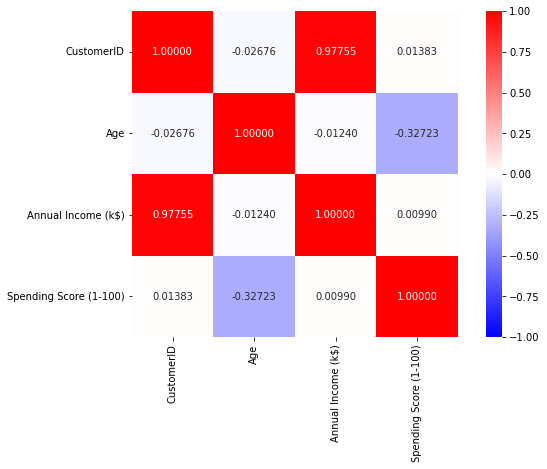

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap= "bwr", annot=True, square=True, fmt=".5f", vmax = 1, vmin = -1)

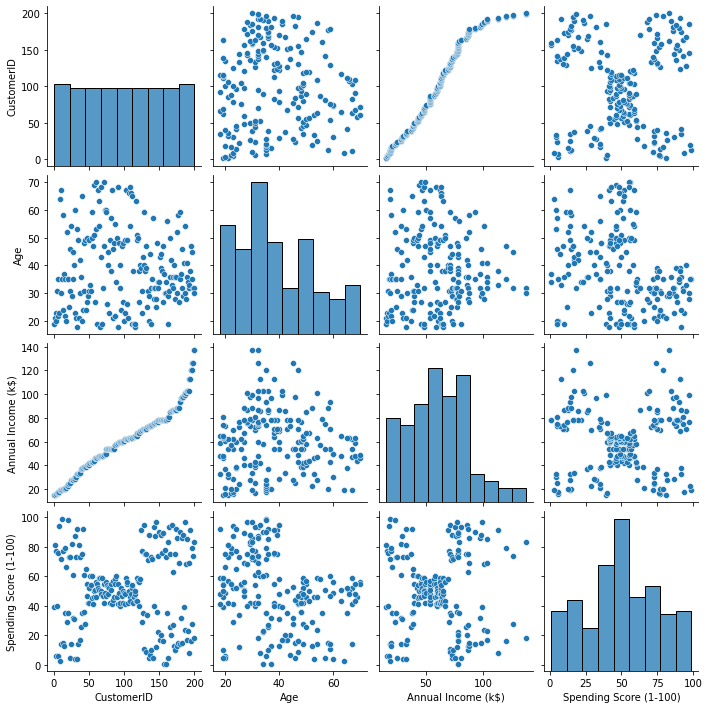

In [52]:
sns.pairplot(data)